# Cruise Vessel Performance Analysis

This notebook contains the analysis and visualization of power consumption and fuel flow trends for two cruise vessels.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_file_path = '/content/drive/MyDrive/task_data[1]/data.csv'
data = pd.read_csv(data_file_path)

# Display the first few rows to understand the dataset
data.head()



,Start Time,End Time,Vessel Name,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),...,Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
0,2023-01-01T00:00:00,2023-01-01T00:05:00,Vessel 1,0.0946,0.1384,5.4654,0.5074,0.0,0.4979,0.4191,...,0.9837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1645.82000
1,2023-01-01T00:05:00,2023-01-01T00:10:00,Vessel 1,0.0540,0.1370,5.4387,0.5158,0.0,0.4982,0.4204,...,0.9885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1643.78999
2,2023-01-01T00:10:00,2023-01-01T00:15:00,Vessel 1,0.0439,0.1785,5.5265,0.5117,0.0,0.5032,0.4199,...,0.9595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1642.07000
3,2023-01-01T00:15:00,2023-01-01T00:20:00,Vessel 1,0.0733,0.1725,5.5257,0.5177,0.0,0.5103,0.4188,...,0.9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.71000
4,2023-01-01T00:20:00,2023-01-01T00:25:00,Vessel 1,0.0780,0.1397,5.4634,0.5169,0.0,0.5100,0.4203,...,0.9932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1644.54000


In [8]:
# Convert 'Start Time' to datetime for better time series handling
data['Start Time'] = pd.to_datetime(data['Start Time'])


In [9]:
# Calculate total propulsion power for each time period
data['Total Propulsion Power (MW)'] = data['Port Side Propulsion Power (MW)'] + data['Starboard Side Propulsion Power (MW)']


In [10]:
# Calculate total fuel flow for main engines
data['Total Fuel Flow (kg/h)'] = data[['Main Engine 1 Fuel Flow Rate (kg/h)',
                                       'Main Engine 2 Fuel Flow Rate (kg/h)',
                                       'Main Engine 3 Fuel Flow Rate (kg/h)',
                                       'Main Engine 4 Fuel Flow Rate (kg/h)']].sum(axis=1)

In [11]:
# Calculate fuel efficiency (Fuel Flow per Propulsion Power)
data['Fuel Efficiency (kg/MW)'] = data['Total Fuel Flow (kg/h)'] / data['Total Propulsion Power (MW)']


In [12]:
# Calculate HVAC power consumption percentage
data['Total HVAC Power (MW)'] = data[['HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)']].sum(axis=1)
data['HVAC Power Consumption (%)'] = (data['Total HVAC Power (MW)'] / data['Power Service (MW)']) * 100


In [14]:
# Calculate scrubber power consumption percentage
data['Scrubber Power Consumption (%)'] = (data['Scrubber Power (MW)'] / data['Power Service (MW)']) * 100


In [15]:
# Calculate EEOI (Estimated from fuel consumption per distance traveled)
# Assuming Speed Over Ground gives us a reasonable proxy for distance
data['Distance (NM)'] = data['Speed Over Ground (knots)'] * (5/60)  # 5 minutes per interval
data['EEOI (kg/NM)'] = data['Total Fuel Flow (kg/h)'] / data['Distance (NM)']

In [16]:
data['SFOC (kg/MW)'] = data['Total Fuel Flow (kg/h)'] / data['Total Propulsion Power (MW)']

In [17]:
# Calculate Engine Load Factor (Assume max rated power is a known constant, here using a proxy value of 10 MW)
max_rated_power = 10  # Placeholder value for max rated power
data['Engine Load Factor (%)'] = (data['Total Propulsion Power (MW)'] / max_rated_power) * 100

In [18]:
# Calculate Bow and Stern Thruster Utilization
data['Bow Thruster Utilization (%)'] = (data[['Bow Thruster 1 Power (MW)', 'Bow Thruster 2 Power (MW)', 'Bow Thruster 3 Power (MW)']].sum(axis=1) / data['Total Propulsion Power (MW)']) * 100
data['Stern Thruster Utilization (%)'] = (data[['Stern Thruster 1 Power (MW)', 'Stern Thruster 2 Power (MW)']].sum(axis=1) / data['Total Propulsion Power (MW)']) * 100


In [19]:
# Calculate Speed and Fuel Consumption Correlation
speed_fuel_corr = data['Speed Through Water (knots)'].corr(data['Total Fuel Flow (kg/h)'])
speed_fuel_corr

0.8969954861138217

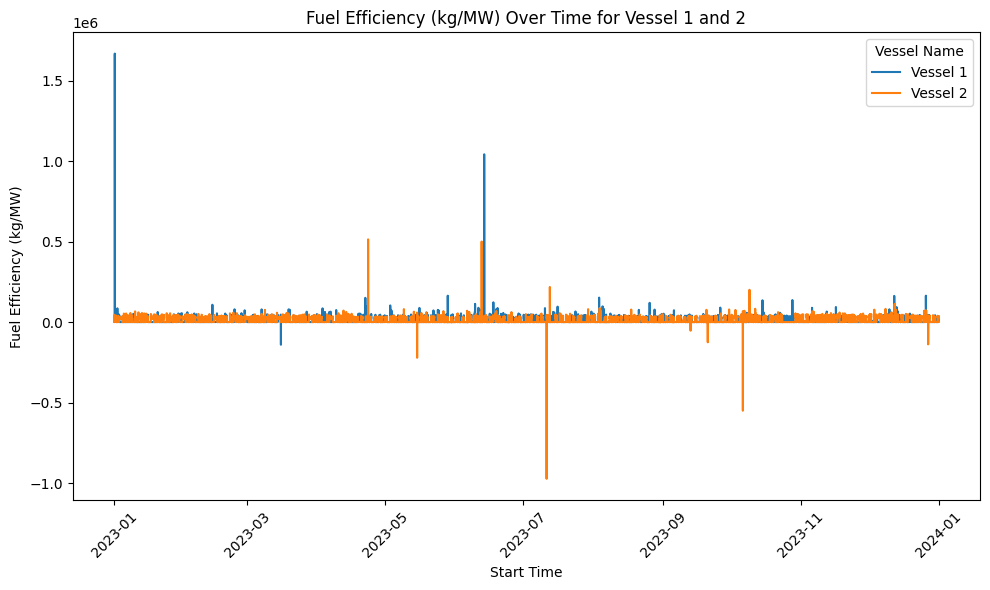

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='Fuel Efficiency (kg/MW)', hue='Vessel Name', data=data)
plt.title('Fuel Efficiency (kg/MW) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

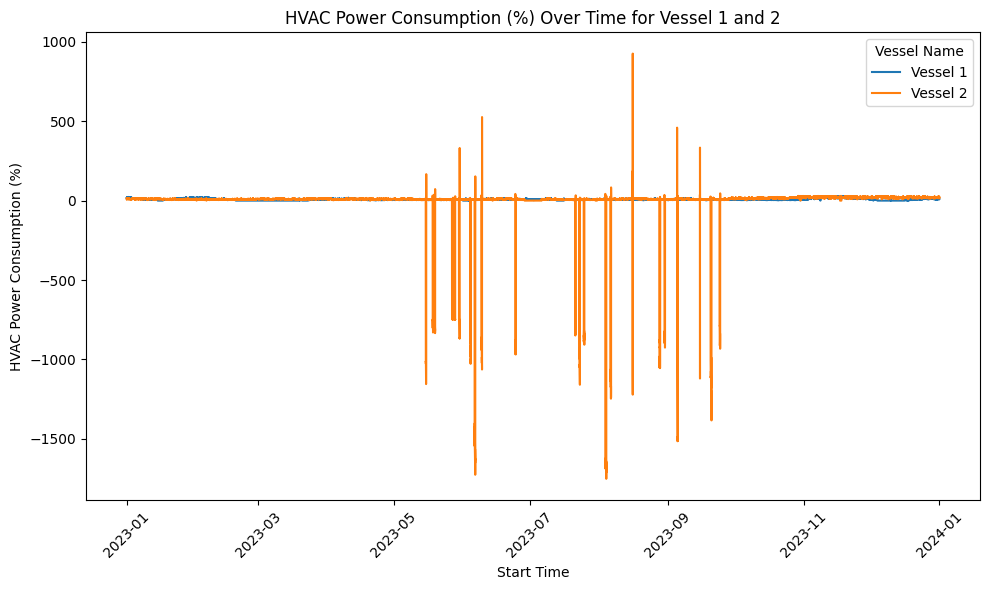

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='HVAC Power Consumption (%)', hue='Vessel Name', data=data)
plt.title('HVAC Power Consumption (%) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

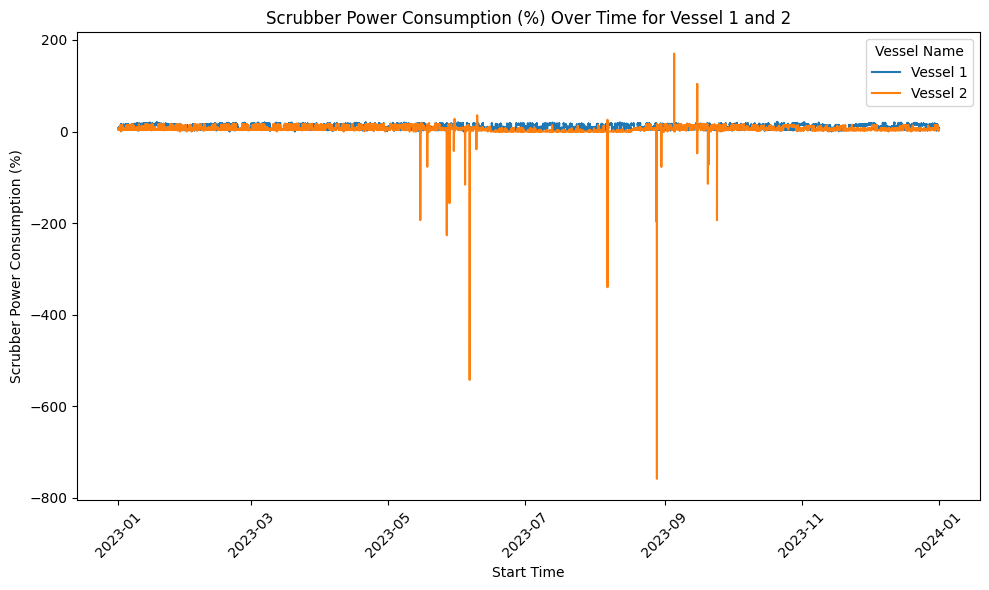

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='Scrubber Power Consumption (%)', hue='Vessel Name', data=data)
plt.title('Scrubber Power Consumption (%) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


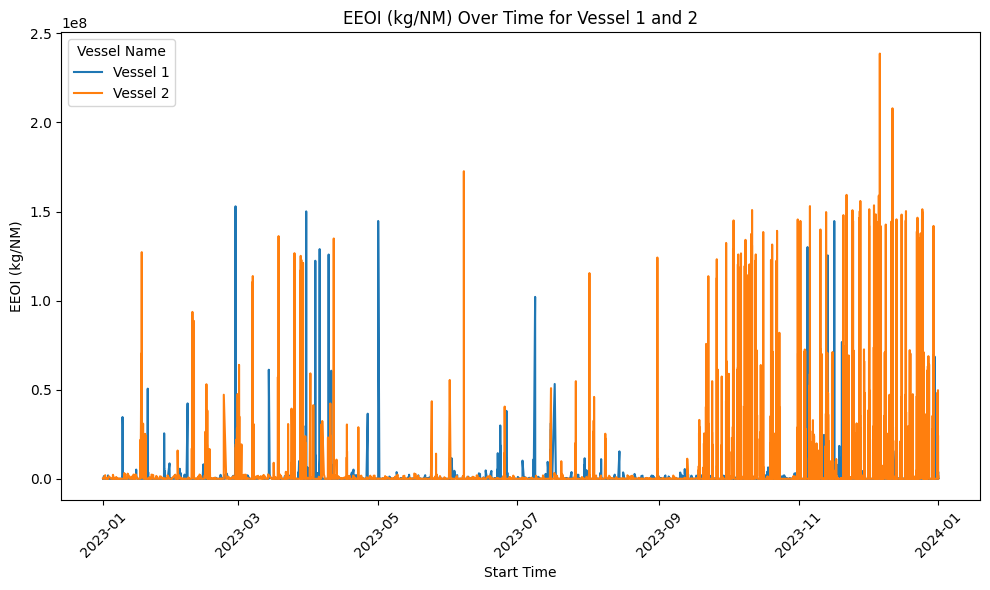

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='EEOI (kg/NM)', hue='Vessel Name', data=data)
plt.title('EEOI (kg/NM) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

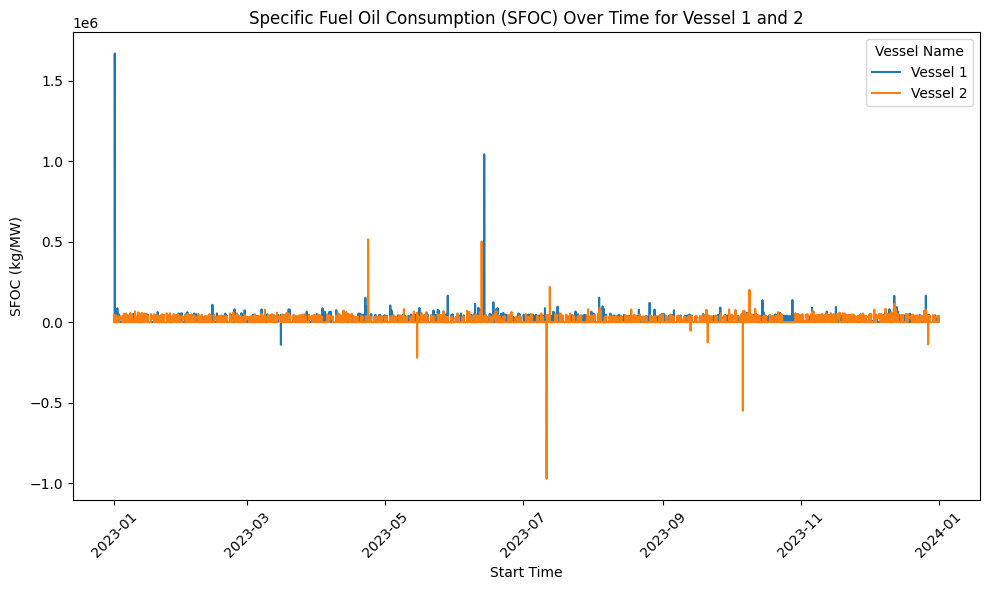

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='SFOC (kg/MW)', hue='Vessel Name', data=data)
plt.title('Specific Fuel Oil Consumption (SFOC) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

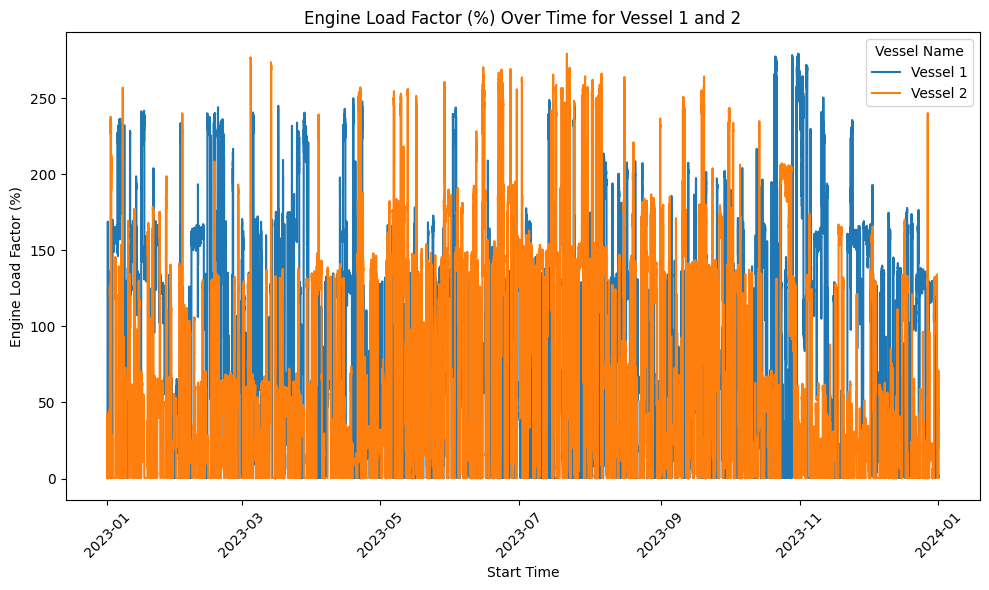

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='Engine Load Factor (%)', hue='Vessel Name', data=data)
plt.title('Engine Load Factor (%) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

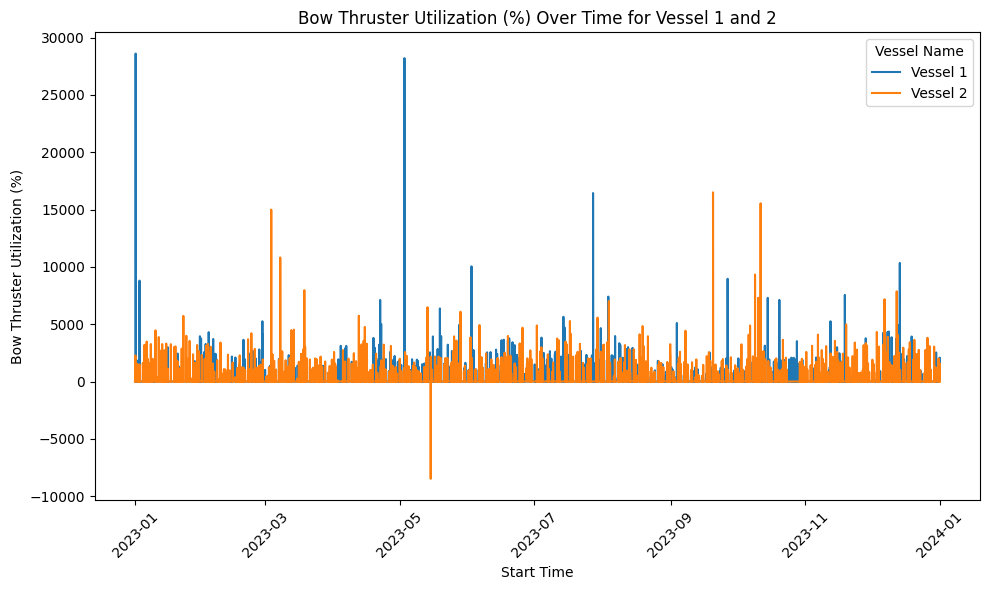

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='Bow Thruster Utilization (%)', hue='Vessel Name', data=data)
plt.title('Bow Thruster Utilization (%) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

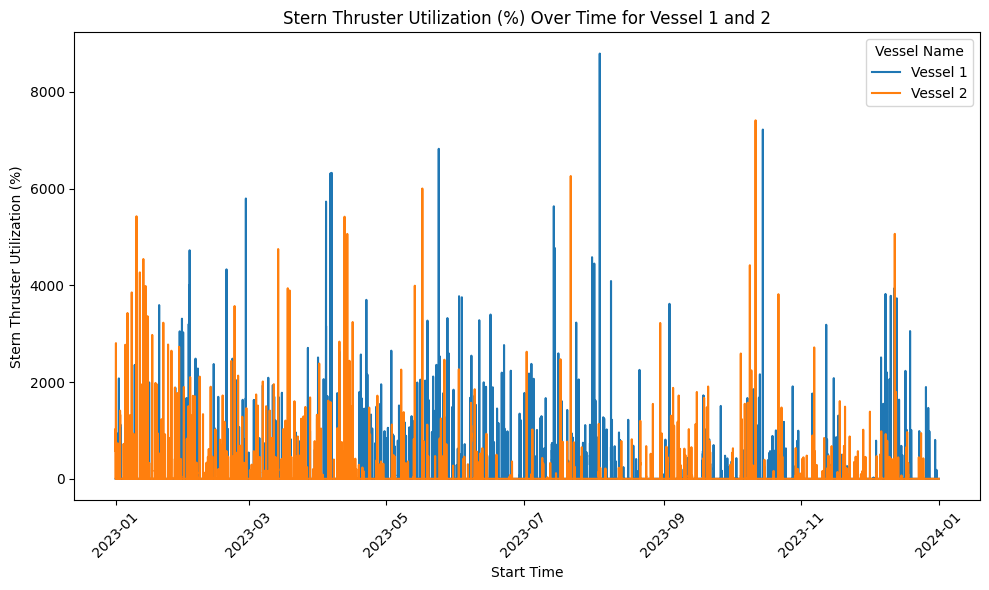

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Time', y='Stern Thruster Utilization (%)', hue='Vessel Name', data=data)
plt.title('Stern Thruster Utilization (%) Over Time for Vessel 1 and 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()